### 참고 영상
[CNN을 활용한 스타일 전송(Style Transfer) | 꼼꼼한 딥러닝 논문 리뷰와 코드 실습](https://www.youtube.com/watch?v=va3e2c4uKJk)

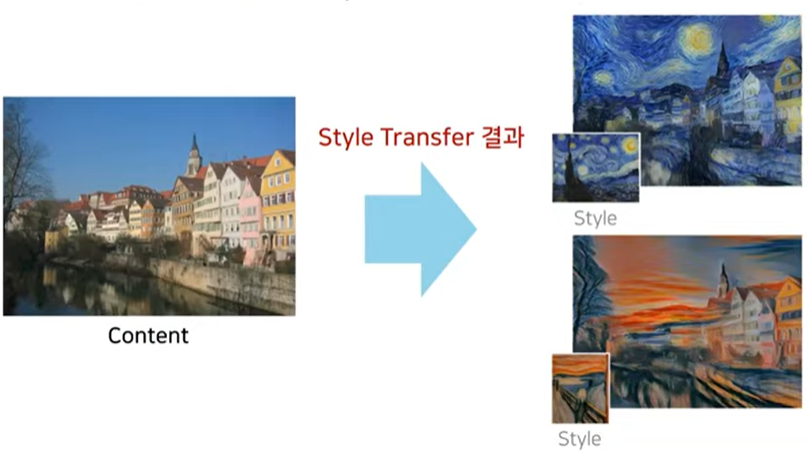

### Style Transfer의 방법
1. 먼저 사전학습된 CNN 모델이 필요함 (일반적으로 분류모델을 사용함)
2. CNN 네트워크의 가중치는 고정한 뒤에, 이미지를 업데이트하는 방식을 사용함
3. 즉, 이미지를 학습(업데이트)한다고 이해하면 된다.

### 이미지를 학습한다?
1. Content Image와 같은 크기의 이미지를 가져옴
2. 처음에는 Noise 값으로 초기화한다.
3. Noise 이미지를 조금씩 업데이트해서 의도한 결과가 나오도록 학습함.

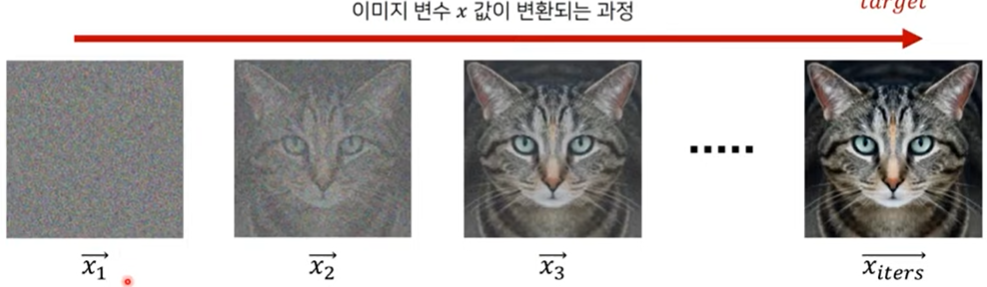

### 수식, 손실 함수
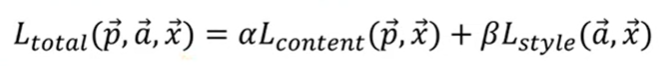

- 이미지를 표현할 때, 벡터로써 표현하기 때문에 수식에서 이미지들을 벡터 형태로 쓴 것을 볼 수 있다.


- Content Iamge를 p로, Style Image를 a로 가정한다.
- 그리고 앞서 말했듯, 하나의 Noise Image를 업데이트 하는 방식으로 학습한다.
- 즉, Content Image로부터 Content정보를 가져오고, Style Image로부터 Style 정보를 가져온다.


- 정보들을 가져오기 위해 2가지 Loss를 정의한다.
> - content Loss가 줄어든다 : content 정보를 잘 가져왔다.
  - style Loss가 줄어든다 : style 정보를 잘 가져왔다.


- 따라서 content loss 와 style loss 둘 다 줄이는 방식을 사용해서(서로 더함), Noise 이미지 x를 업데이트 할 때,
- p 이미지로부터 content 정보를 가져오고, 동시에 a 이미지와 style 정보가 유사하도록 업데이트 한다.

### Content Loss
- 두 이미지의 특징(feature)의 activation 값이 동일하도록 만든다.

- Feature Map F와 P에서의 동일한 위치마다 1대1로 비교해서, 값 자체가 동일해지도록 업데이트 한다.
- 즉, 특정 레이어에서 나온 output feature 자체가 동일하지도록 업데이트 한다.

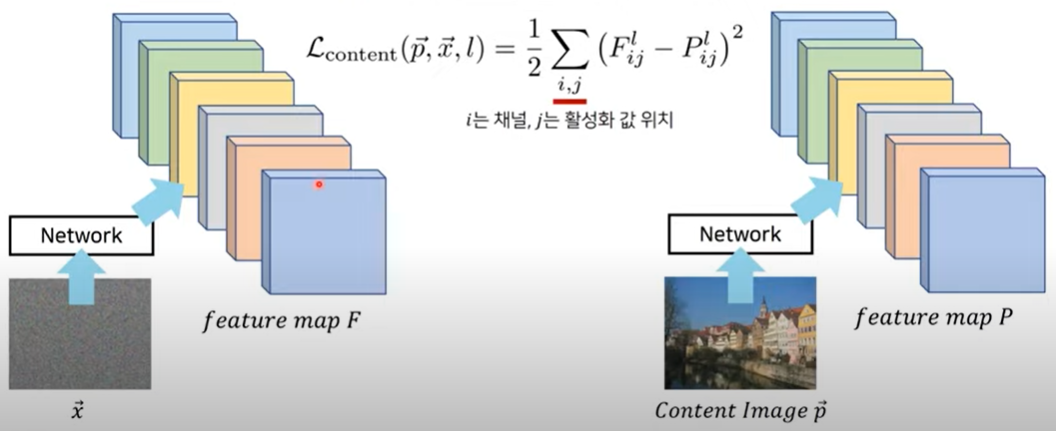

### Style Loss
- 스타일이란, 서로 다른 특징(feature)간의 상관관계를 의미함.
- 만약, 2개의 이미지가 있을 때 둘이 스타일이 같다는 것은, 두 이미지 각각에 있는 특징들의 상관관계 정도가 유사하다고 볼 수 있다.


- 상관관계가 높다? : feature 1에서 높은 activation 값이 나오면 feature 2에서도 높은 activation 값이 나온다는 것이다.
- 그래서 $G_{ij}$ 수식은 서로 다른 채널 i와 j를 의미하고, 각 feature에 존재하는 원소의 위치를 k로 표현한다.
- $G_{ij}$ 의 값이 크다는 것은 상관관계가 크다는 것
- Gram Matrix의 값 자체를 해당 이미지의 스타일(style)이라고 볼 수 있다.
- 두 이미지의 Gram Matrix를 같도록 학습한다.

- 그래서  Style Loss는 두 이미지의 특징 상관관계(Gram Matrix)를 유사하도록 만든다.




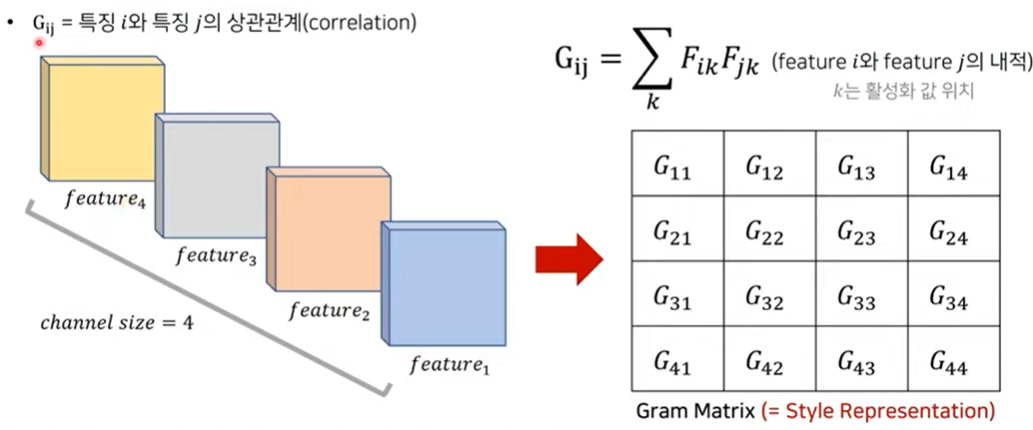

1. x 이미지로부터 구한 Gram Matrix인 G와
2. style 이미지로부터 구한 Gram Matrix인 A를 서로 비교해서
3. 둘의 차이가 감소하도록 업데이트 한다. (유사해지도록)

$E_L$은 특정 레이어 L에 대한 Gram Matrix의 차이 값을 의미한다.

$4N_{i^2}M_{i^2}$ 으로 나누는 이유는 $E_L$값이 너무 커지지 않게 normalize 해준 것

$w_L$은 어떤 레이어에 더 많은 가중치를 줄 지 설정하기 위해 넣은 하이퍼 파라미터 이다.

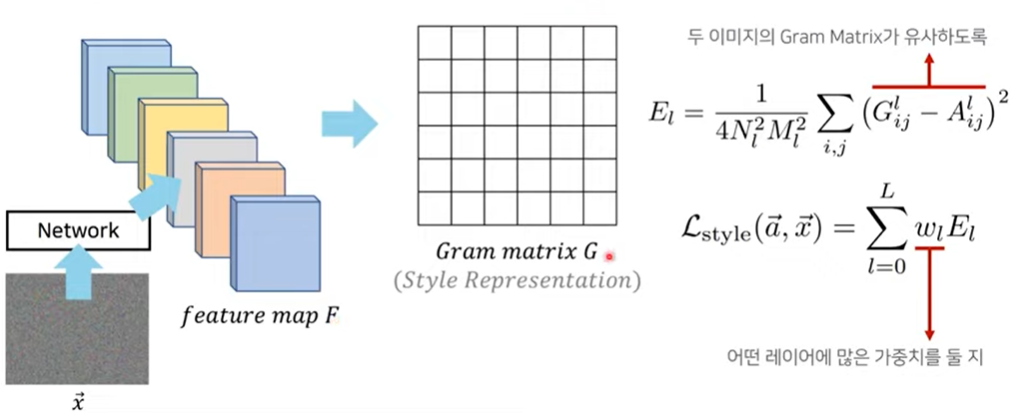